# Imports

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load Dataset

In [7]:
df_raw = pd.read_csv('data_health/train.csv')

In [8]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Data Description

In [33]:
df1 = df_raw.copy()
df1.columns = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## Data Dimension

In [18]:
print('Nums of rows: {}'.format(df1.shape[0]))
print('Nums of colums: {}'.format(df1.shape[1]))


Nums of rows: 381109
Nums of colums: 12


## Data Types

In [19]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_Age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## Check NA

In [23]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_Age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## Data Description

In [24]:
df1.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Feature Engineering

In [34]:
df2 = df1.copy()

In [35]:
# Vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year')

In [36]:
# Vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].map({'Yes':1, 'No':0})

In [ ]:
# Gender
df2['gender'] = df2['gender'].map({'Male':1, 'Female':0})

gender
1    206089
0    175020
Name: count, dtype: int64

## Data Filtering

In [38]:
df3 = df2.copy()

In [41]:
df3.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## EDA

<Axes: xlabel='response', ylabel='age'>

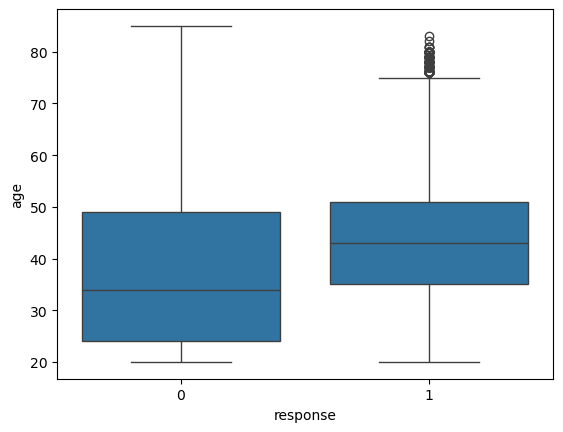

In [42]:
# age
sns.boxplot(x='response', y='age', data=df3)

<Axes: title={'center': 'Not Interested'}, xlabel='age', ylabel='Count'>

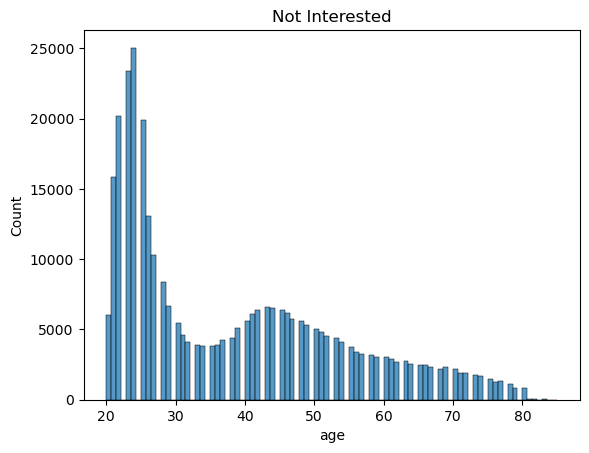

In [54]:
aux00 = df3.loc[df3['response'] == 0, 'age']
plt.title('Not Interested')
sns.histplot(aux00)


<Axes: title={'center': 'Interested'}, xlabel='age', ylabel='Count'>

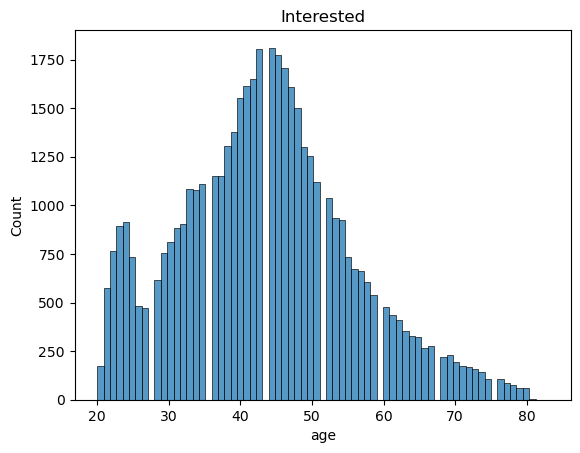

In [55]:
aux00 = df3.loc[df3['response'] == 1, 'age']
plt.title('Interested')
sns.histplot(aux00)

<Axes: xlabel='response', ylabel='annual_premium'>

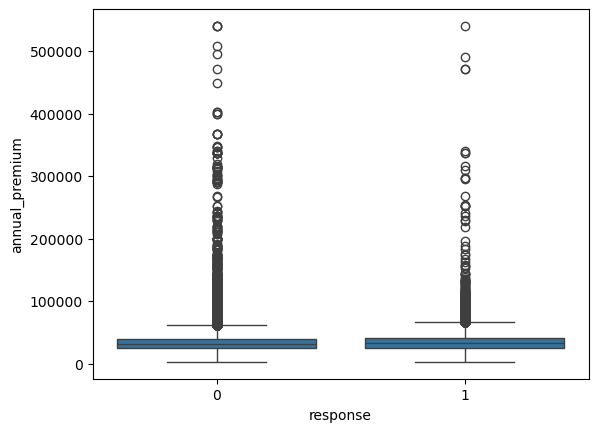

In [57]:
# Annual Premium
sns.boxplot(x='response', y='annual_premium', data=df3)

<Axes: title={'center': 'Not Interested'}, xlabel='annual_premium', ylabel='Count'>

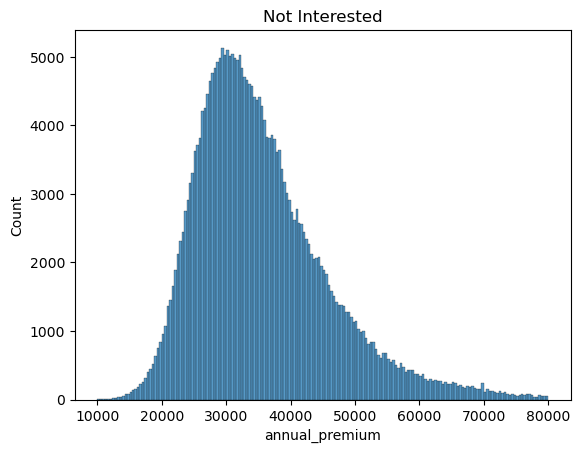

In [59]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
plt.title('Not Interested')
sns.histplot(aux00)


<Axes: title={'center': 'Interested'}, xlabel='annual_premium', ylabel='Count'>

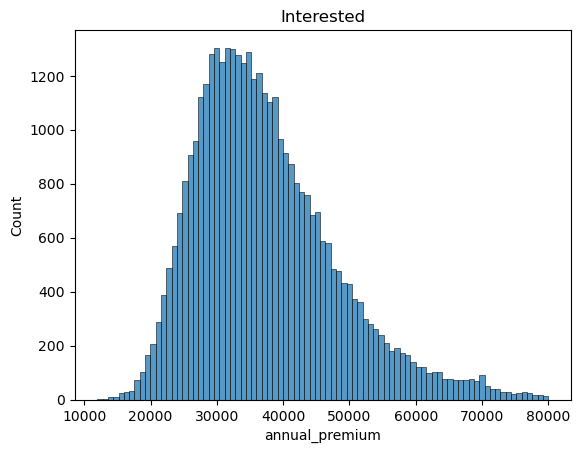

In [61]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
plt.title('Interested')
sns.histplot(aux00)

In [65]:
# Driving license
df3[['driving_license', 'response']].groupby('response').sum()

,driving_license
response,
0,333628
1,46669


<Axes: xlabel='region_code', ylabel='id'>

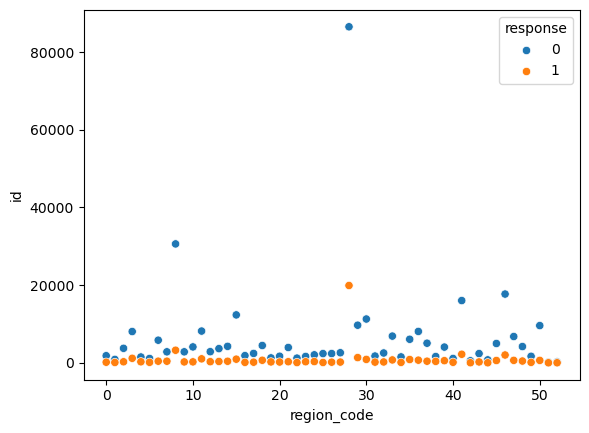

In [71]:
# Region Code
aux0 = df3[['id','region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()

sns.scatterplot(x='region_code', y='id', hue='response', data=aux0)

In [ ]:
# Previously_insured


## Feature Selection

## Data Preparation

## Machine Learning